In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("C:\\Users\\Pankaj\\Desktop\\Dataset\\Boston_housing.csv")

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.zn.replace(0, np.nan, inplace=True)
data.chas.replace(0, np.nan, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         134 non-null float64
indus      506 non-null float64
chas       35 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [6]:
data.isnull().sum()/len(data)*100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
b           0.000000
lstat       0.000000
medv        0.000000
dtype: float64

In [7]:
data = data.drop("zn", 1)
data = data.drop("chas", 1)

In [8]:
data.isnull().sum()/len(data)*100

crim       0.0
indus      0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

In [9]:
data.corr()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
indus,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
nox,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
ptratio,0.289946,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
b,-0.385064,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461


Text(0.5,1,'Correlation')

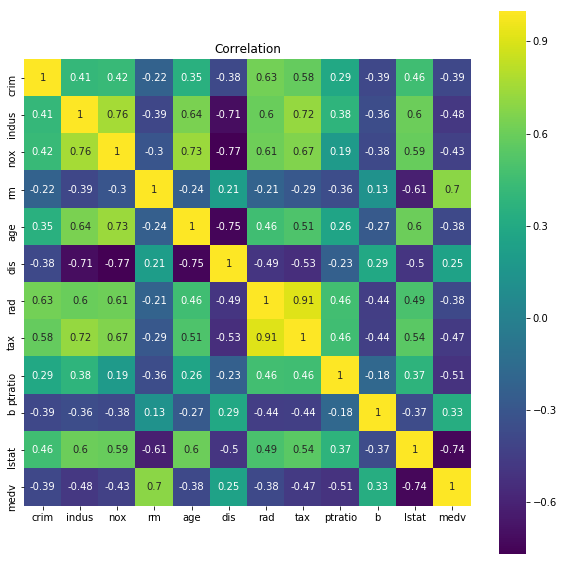

In [10]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation')

In [11]:
data = data.drop(["rad","tax","dis","age"], 1)
data.shape

(506, 8)

In [12]:
X = data.drop("medv",1).values
y = data["medv"].values

In [13]:
pca= PCA()

In [14]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.41978194, -1.2879095 , -0.14421743, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.59338101, -0.74026221, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.59338101, -0.74026221, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658,  0.11573841,  0.15812412, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407,  0.11573841,  0.15812412, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016,  0.11573841,  0.15812412, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [15]:
pca.fit_transform(X)

array([[-1.97211024,  0.59768267, -0.60108255, ...,  0.38664927,
         0.28142543, -0.62304466],
       [-1.23831918, -0.25830272,  0.06828658, ...,  0.05618521,
         0.02647495,  0.09980334],
       [-1.91503575,  0.52105926,  0.36884808, ..., -0.04006242,
         0.06420373,  0.10642031],
       ...,
       [-0.59389099, -0.08245307,  0.61169186, ..., -0.4804092 ,
         0.12947899, -0.32492734],
       [-0.4404716 , -0.23262198,  0.56730136, ..., -0.48373932,
         0.16834501, -0.33567707],
       [-0.00219328, -0.92450271,  0.34045304, ..., -0.43443481,
         0.54374601, -0.43375723]])

In [16]:
features = range(pca.n_components_)

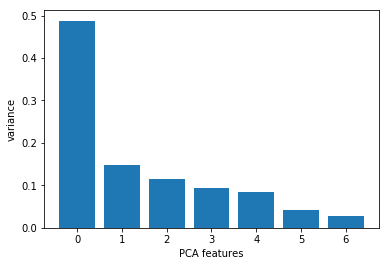

In [17]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [18]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 7)
(152, 7)
(354,)
(152,)


In [20]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
pca = PCA(n_components=4)

In [22]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.n_components_

4

In [24]:
pca.explained_variance_

array([3.47964585, 1.01111235, 0.77413271, 0.65443654])

In [25]:
pca.explained_variance_ratio_

array([0.49568805, 0.14403659, 0.11027798, 0.09322684])

In [26]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = lr.predict(X_test)

In [30]:
lr.score(X_test, y_test)

0.5471230138083647

In [31]:
r2 = lr.score(X_test, y_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("The model performance is")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))
print("\n")

The model performance is
--------------------------------------
R2 score is 0.5471230138083647
RMSE is 6.050221694800512


